In [ ]:

!pip install wordcloud

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the visual style for all plots
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [6]:
df = pd.read_csv('student_feedback.csv')
cols_to_drop = ['Unnamed: 0', 'Student ID']
df_clean = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

print("Data Loaded Successfully!")
df_clean.head()

Data Loaded Successfully!


,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,5,2,7,6,9,2,1,8
1,6,5,8,6,2,1,2,9
2,7,7,6,5,4,2,3,1
3,9,6,7,1,5,9,4,6
4,8,10,8,4,6,6,9,9


In [7]:
# Calculate average ratings
avg_scores = df_clean.mean().sort_values(ascending=False)

print("--- Average Student Ratings (Out of 10) ---")
print(avg_scores)

# Identify Strengths and Weaknesses
print(f"\nYour TOP Strength: {avg_scores.index[0]} ({avg_scores.values[0]:.2f})")
print(f"Priority for Improvement: {avg_scores.index[-1]} ({avg_scores.values[-1]:.2f})")

--- Average Student Ratings (Out of 10) ---
Well versed with the subject                            7.497502
Explains concepts in an understandable way              6.081918
Use of presentations                                    5.942058
Provides support for students going above and beyond    5.662338
Structuring of the course                               5.636364
Course recommendation based on relevance                5.598402
Solves doubts willingly                                 5.474525
Degree of difficulty of assignments                     5.430569
dtype: float64

Your TOP Strength: Well versed with the subject (7.50)
Priority for Improvement: Degree of difficulty of assignments (5.43)


/tmp/ipython-input-3654507764.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Course recommendation based on relevance", data=df, palette="viridis")


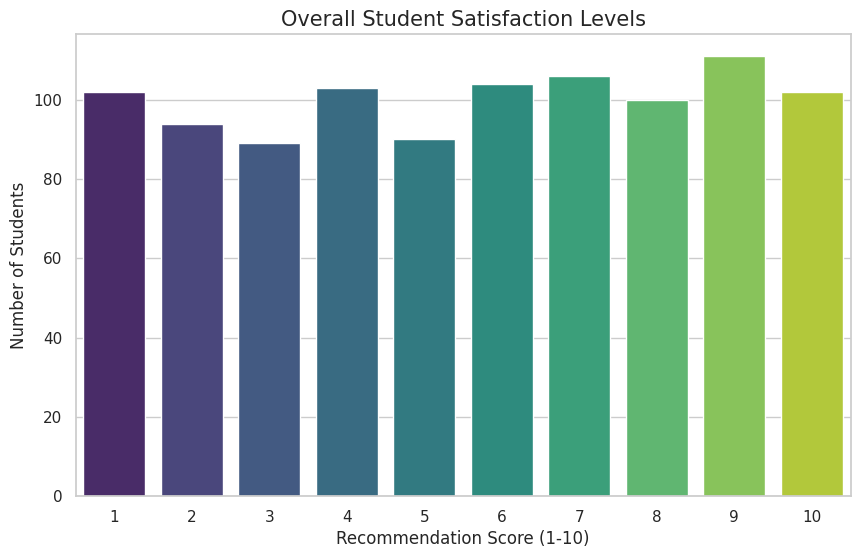

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the data
df = pd.read_csv('student_feedback.csv')

# 2. Create the plot using your specific column name
plt.figure(figsize=(10, 6))

# Using 'Course recommendation based on relevance' as the satisfaction metric
sns.countplot(x="Course recommendation based on relevance", data=df, palette="viridis")

plt.title("Overall Student Satisfaction Levels", fontsize=15)
plt.xlabel("Recommendation Score (1-10)", fontsize=12)
plt.ylabel("Number of Students", fontsize=12)

plt.show()

/tmp/ipython-input-2069240053.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_scores.values, y=avg_scores.index, palette='viridis')


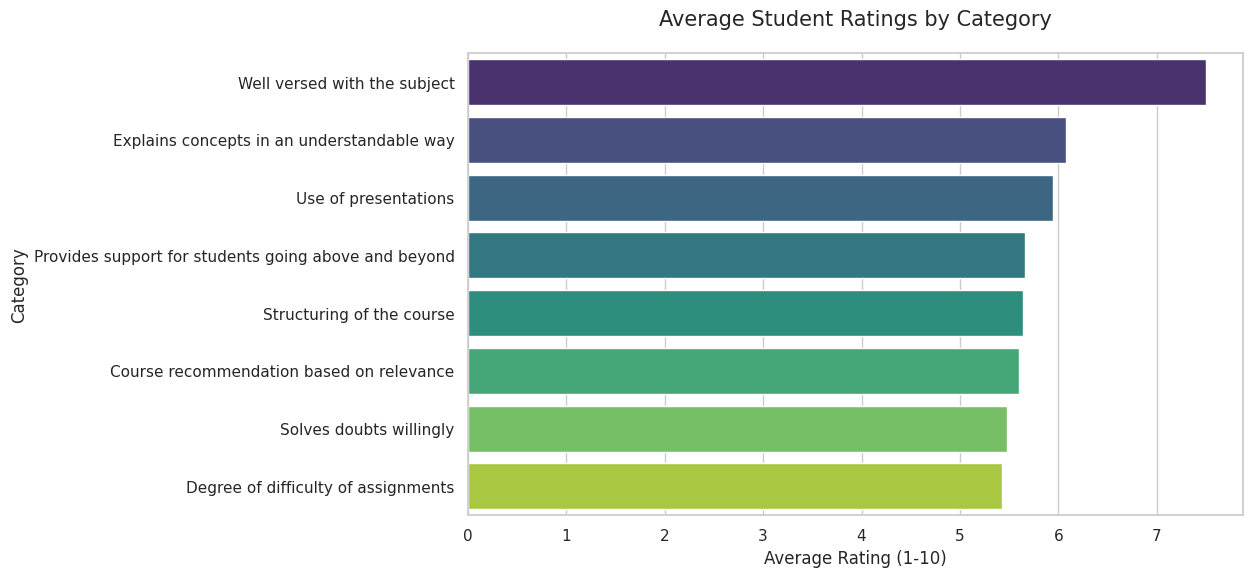

In [15]:
plt.figure(figsize=(10, 6))

# Calculate and sort average scores
avg_scores = df_clean.mean().sort_values(ascending=False)

# Create the plot
sns.barplot(x=avg_scores.values, y=avg_scores.index, palette='viridis')

plt.title('Average Student Ratings by Category', fontsize=15, pad=20)
plt.xlabel('Average Rating (1-10)', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.show()

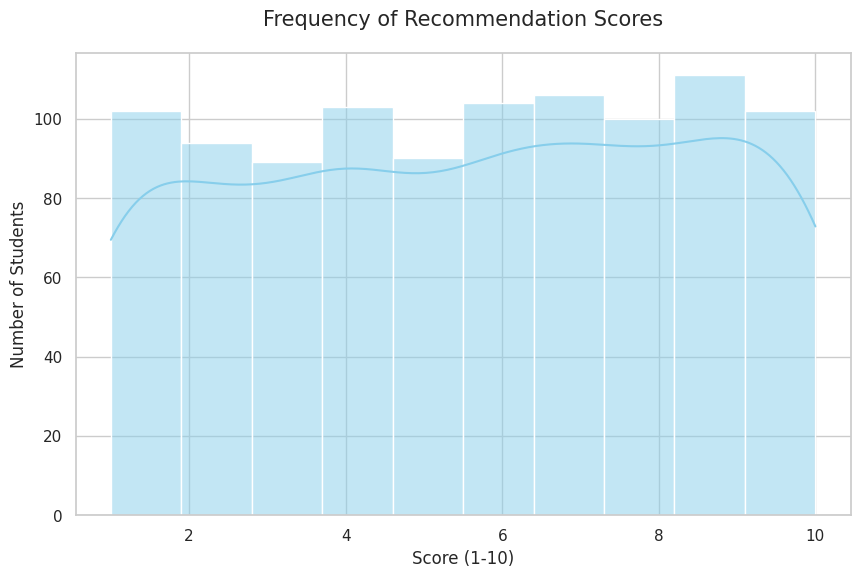

In [16]:
plt.figure(figsize=(10, 6))

sns.histplot(df_clean['Course recommendation based on relevance'], kde=True, color='skyblue', bins=10)

plt.title('Frequency of Recommendation Scores', fontsize=15, pad=20)
plt.xlabel('Score (1-10)', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.show()

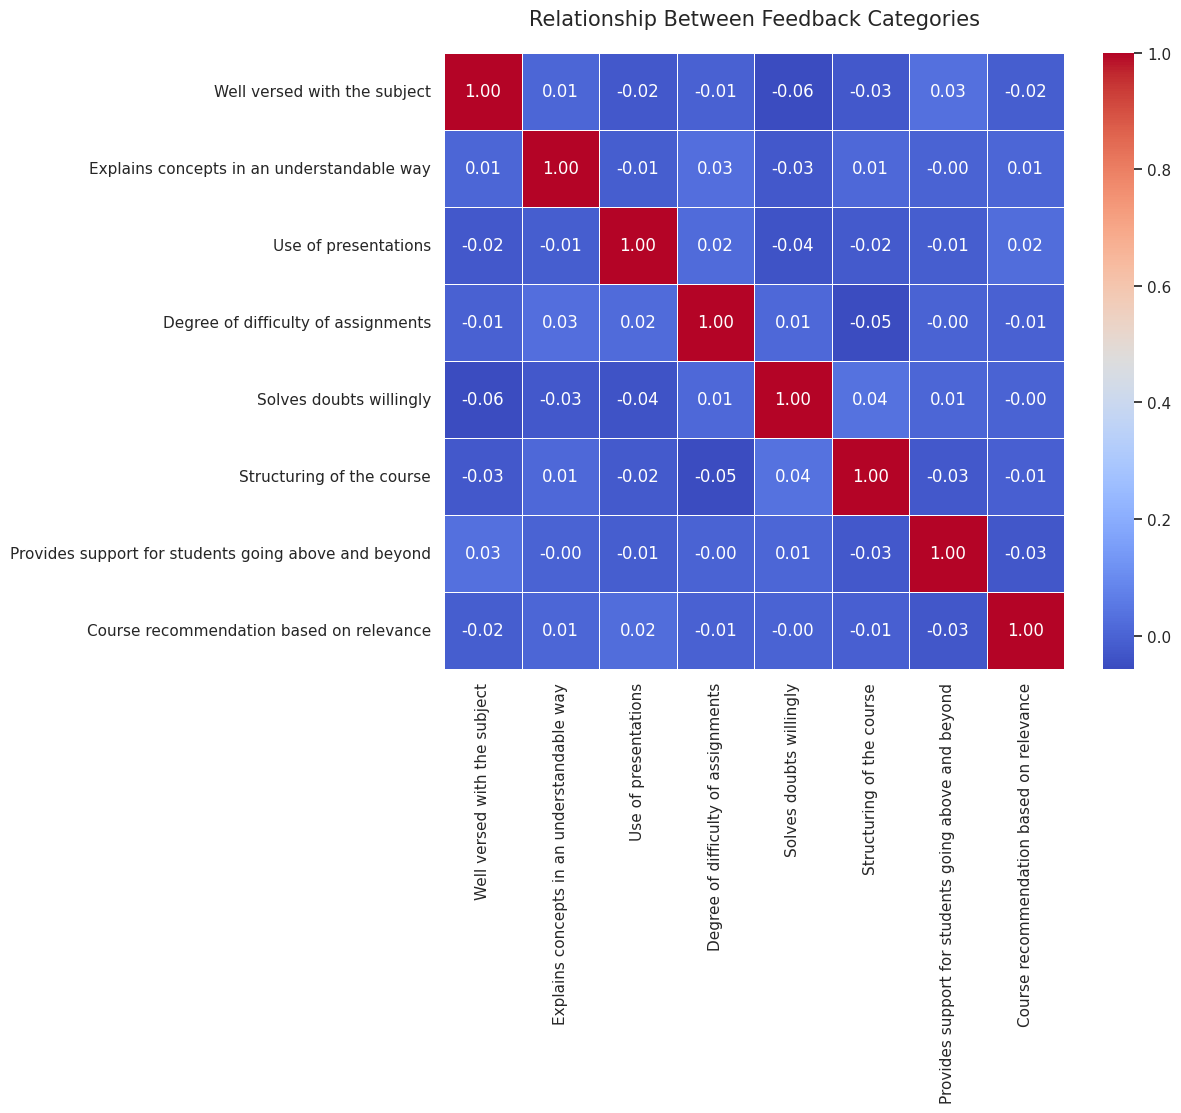

In [17]:
plt.figure(figsize=(10, 8))

corr = df_clean.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Relationship Between Feedback Categories', fontsize=15, pad=20)
plt.show()

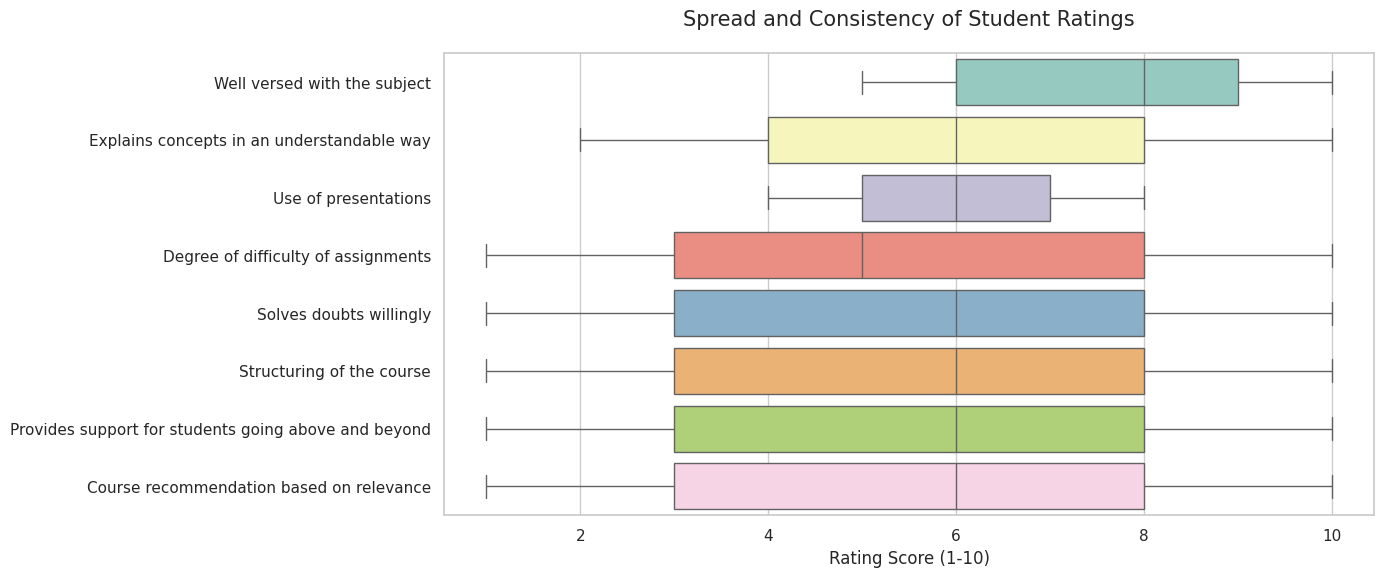

Summary report saved as 'feedback_summary_report.csv'


In [18]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=df_clean, orient='h', palette='Set3')

plt.title('Spread and Consistency of Student Ratings', fontsize=15, pad=20)
plt.xlabel('Rating Score (1-10)', fontsize=12)
plt.show()

# Export a summary report to CSV
df_clean.describe().transpose().to_csv('feedback_summary_report.csv')
print("Summary report saved as 'feedback_summary_report.csv'")

/tmp/ipython-input-3107076380.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


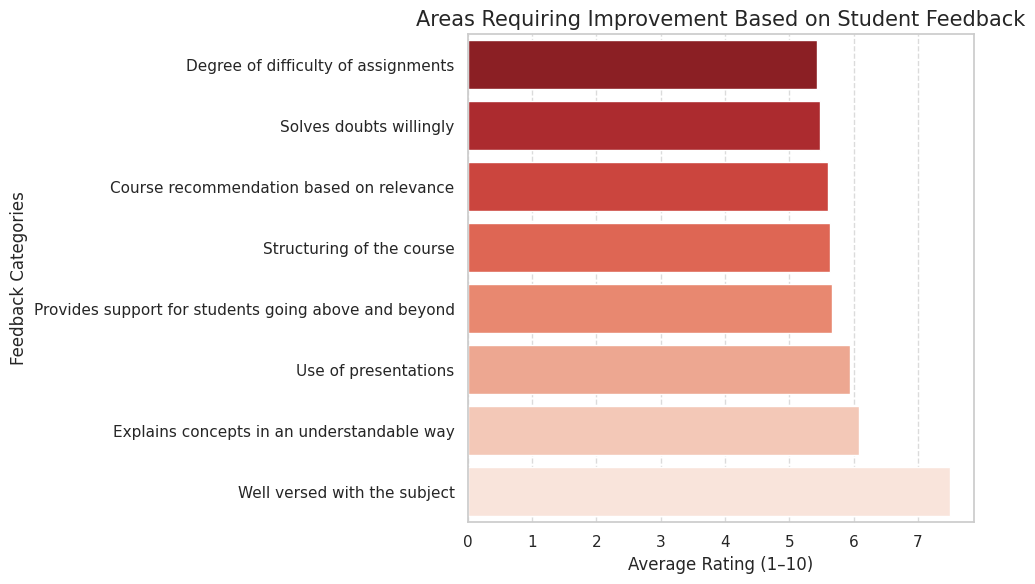

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the data
df = pd.read_csv('student_feedback.csv')

# 2. Clean data (remove non-rating columns)
cols_to_drop = ['Unnamed: 0', 'Student ID']
df_ratings = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

# 3. Calculate average ratings and sort (Lowest scores = Highest need for improvement)
improvement_areas = df_ratings.mean().sort_values(ascending=True)

# 4. Create the Bar Plot
plt.figure(figsize=(10, 6))

sns.barplot(
    x=improvement_areas.values,
    y=improvement_areas.index,
    palette="Reds_r" # Red palette highlights areas needing work
)

plt.title("Areas Requiring Improvement Based on Student Feedback", fontsize=15)
plt.xlabel("Average Rating (1–10)", fontsize=12)
plt.ylabel("Feedback Categories", fontsize=12)

# Optional: Add gridlines for easier reading
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()